In [4]:
# Cach do os from dir
import os

checklist = os.listdir('component')

print(checklist)
print(type(checklist))

['g_reconstruct', '__init__.py', 'd_scheduling', 'f_assemble', 'a_backend', 'h_analyze', '__pycache__', 'b_benchmark', 'e_mapping', 'c_circuit_cutting']
<class 'list'>


Observable: SparsePauliOp(['ZZII', 'IZZI', 'IIZZ', 'XIXI', 'ZIZZ', 'IXIX'],
              coeffs=[ 1.+0.j,  1.+0.j, -1.+0.j,  1.+0.j,  1.+0.j,  1.+0.j])


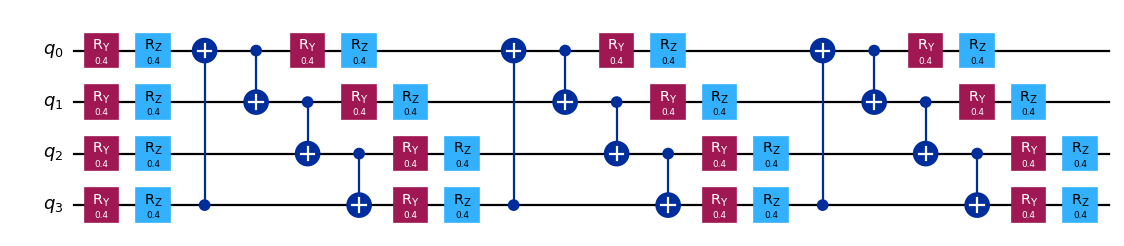

In [5]:
import numpy as np
from qiskit.circuit.library import efficient_su2
from qiskit.quantum_info import SparsePauliOp
from qiskit.transpiler import generate_preset_pass_manager
from qiskit_ibm_runtime.fake_provider import FakeManilaV2
from qiskit_ibm_runtime import SamplerV2, Batch
from qiskit_aer.primitives import EstimatorV2
from qiskit_addon_cutting import (
    cut_gates,
    partition_problem,
    generate_cutting_experiments,
    reconstruct_expectation_values,
)
 
circuit = efficient_su2(num_qubits=4, entanglement="circular")
circuit.assign_parameters([0.4] * len(circuit.parameters), inplace=True)
 
observable = SparsePauliOp(["ZZII", "IZZI", "-IIZZ", "XIXI", "ZIZZ", "IXIX"])
print(f"Observable: {observable}")
circuit.draw("mpl", scale=0.8)

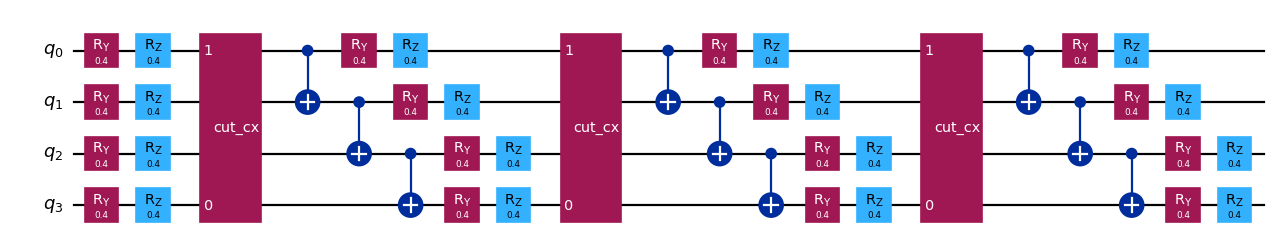

In [6]:
# Find the indices of the distant gates
cut_indices = [
    i
    for i, instruction in enumerate(circuit.data)
    if {circuit.find_bit(q)[0] for q in instruction.qubits} == {0, 3}
]
 
# Decompose distant CNOTs into TwoQubitQPDGate instances
qpd_circuit, bases = cut_gates(circuit, cut_indices)
 
qpd_circuit.draw("mpl", scale=0.8)

In [ ]:
import qiskit
from qiskit_aer.primitives import SamplerV2

# Generate 3-qubit GHZ state
circ = qiskit.QuantumCircuit(3)
circ.h(0)
circ.cx(0, 1)
circ.cx(1, 2)
circ.measure_all()

# Construct an ideal simulator with SamplerV2
sampler = SamplerV2()
job = sampler.run([circ], shots=128)

# Perform an ideal simulation
result_ideal = job.result()
counts_ideal = result_ideal[0].data.meas.get_counts()
print('Counts(ideal):', counts_ideal)

Counts(ideal): {'111': 61, '000': 67}


# Test AerSimulators

In [6]:
import numpy as np

# Import Qiskit
from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram, plot_state_city
import qiskit.quantum_info as qi
from qiskit_ibm_runtime.fake_provider import FakeBelemV2

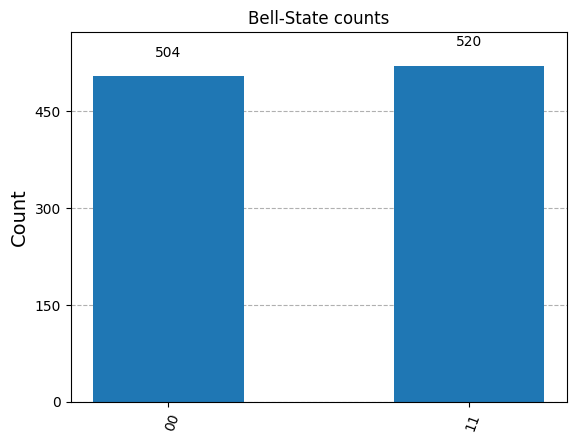

In [12]:
# Create circuit
circ = QuantumCircuit(2)
circ.h(0)
circ.cx(0, 1)
circ.measure_all()

# Transpile for simulator
simulator = AerSimulator()
circ = transpile(circ, simulator)

# Run and get counts
result = simulator.run(circ).result()
counts = result.get_counts(circ)
plot_histogram(counts, title='Bell-State counts')

In [ ]:
from qiskit_ibm_runtime.fake_provider import FakeBelemV2
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager
from qiskit import QuantumCircuit
from qiskit.quantum_info import SparsePauliOp

circ = QuantumCircuit(3)
circ.h(0)
circ.cx(0, 1)
circ.cx(0,2)
circ.measure_all()
circ.draw("mpl")
observable = SparsePauliOp(["ZZII", "IZZI", "-IIZZ", "XIXI", "ZIZZ", "IXIX"])
backend = FakeBelemV2()

pass_manager = generate_preset_pass_manager(optimization_level=3, backend=backend)

isa_circuit = pass_manager.run(circ)
isa_observable = observable.apply_layout(isa_circuit.layout)



QiskitError: 'Number of qargs does not match (3 != 4)'

In [ ]:
from qiskit.visualization import plot_circuit_layout

plot_circuit_layout(isa_circuit, backend)

MissingOptionalLibraryError: "The 'Graphviz' library is required to use 'plot_coupling_map'.  To install, follow the instructions at https://graphviz.org/download/. Qiskit needs the Graphviz binaries, which the 'graphviz' package on pip does not install. You must install the actual Graphviz software."

In [ ]:
# Run and get memory
result = simulator.run(circ, shots=10, memory=True).result()
memory = result.get_memory(circ)
print(memory)

['00', '00', '00', '00', '11', '00', '00', '11', '00', '11']


In [ ]:
from qiskit import QuantumCircuit
from qiskit.quantum_info import PauliList
from qiskit_ibm_runtime.utils.embeddings import Embedding
from qiskit_ibm_runtime.utils.noise_learner_result import LayerError, PauliLindbladError
 
# A five-qubit 1-D embedding with nearest neighbouring connectivity
coordinates1 = [(0, 0), (0, 1), (0, 2), (0, 3), (0, 4), (0, 5)]
coupling_map1 = [(0, 1), (1, 2), (2, 3), (3, 4), (4, 5)]
embedding1 = Embedding(coordinates1, coupling_map1)
 
# A six-qubit horseshoe-shaped embedding with nearest neighbouring connectivity
coordinates2 = [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2)]
coupling_map2 = [(0, 1), (1, 2), (0, 3), (3, 4), (4, 5)]
embedding2 = Embedding(coordinates2, coupling_map2)
 
# A LayerError object
circuit = QuantumCircuit(4)
qubits = [1, 2, 3, 4]
generators = PauliList(["IIIX", "IIXI", "IXII", "YIII", "ZIII", "XXII", "ZZII"])
rates = [0.10, 0.01, 0.01, 0.005, 0.02, 0.01, 0.01]
error = PauliLindbladError(generators, rates)
layer_error = LayerError(circuit, qubits, error)
 
# Draw the layer error on embedding1
layer_error.draw_map(embedding1)
 
# Draw the layer error on embedding2
layer_error.draw_map(embedding2)

In [ ]:
from qiskit import transpile
from qiskit.circuit.library import RealAmplitudes
from qiskit.quantum_info import SparsePauliOp
from qiskit_aer import AerSimulator

sim = AerSimulator()
# --------------------------
# Simulating using estimator
#---------------------------
from qiskit_aer.primitives import EstimatorV2

psi1 = transpile(RealAmplitudes(num_qubits=2, reps=2), sim, optimization_level=0)
psi2 = transpile(RealAmplitudes(num_qubits=2, reps=3), sim, optimization_level=0)

H1 = SparsePauliOp.from_list([("II", 1), ("IZ", 2), ("XI", 3)])
H2 = SparsePauliOp.from_list([("IZ", 1)])
H3 = SparsePauliOp.from_list([("ZI", 1), ("ZZ", 1)])

theta1 = [0, 1, 1, 2, 3, 5]
theta2 = [0, 1, 1, 2, 3, 5, 8, 13]
theta3 = [1, 2, 3, 4, 5, 6]

estimator = EstimatorV2()

# calculate [ [<psi1(theta1)|H1|psi1(theta1)>,
#              <psi1(theta3)|H3|psi1(theta3)>],
#             [<psi2(theta2)|H2|psi2(theta2)>] ]
job = estimator.run(
    [
        (psi1, [H1, H3], [theta1, theta3]),
        (psi2, H2, theta2)
    ],
    precision=0.01
)
result = job.result()
print(f"expectation values : psi1 = {result[0].data.evs}, psi2 = {result[1].data.evs}")

# --------------------------
# Simulating using sampler
# --------------------------
from qiskit_aer.primitives import SamplerV2
from qiskit import QuantumCircuit

# create a Bell circuit
bell = QuantumCircuit(2)
bell.h(0)
bell.cx(0, 1)
bell.measure_all()

# create two parameterized circuits
pqc = RealAmplitudes(num_qubits=2, reps=2)
pqc.measure_all()
pqc = transpile(pqc, sim, optimization_level=0)
pqc2 = RealAmplitudes(num_qubits=2, reps=3)
pqc2.measure_all()
pqc2 = transpile(pqc2, sim, optimization_level=0)

theta1 = [0, 1, 1, 2, 3, 5]
theta2 = [0, 1, 2, 3, 4, 5, 6, 7]

# initialization of the sampler
sampler = SamplerV2()

# collect 128 shots from the Bell circuit
job = sampler.run([bell], shots=128)
job_result = job.result()
print(f"counts for Bell circuit : {job_result[0].data.meas.get_counts()}")
 
# run a sampler job on the parameterized circuits
job2 = sampler.run([(pqc, theta1), (pqc2, theta2)])
job_result = job2.result()
print(f"counts for parameterized circuit : {job_result[0].data.meas.get_counts()}")

expectation values : psi1 = [ 1.55502014 -1.07722701], psi2 = 0.18229908654062213
counts for Bell circuit : {'00': 59, '11': 69}
counts for parameterized circuit : {'10': 101, '00': 109, '01': 380, '11': 434}


# Draw circuit with mpl
        **text**: ASCII art TextDrawing that can be printed in the console.

        **mpl**: images with color rendered purely in Python using matplotlib.

        **latex_source**: raw uncompiled latex output.


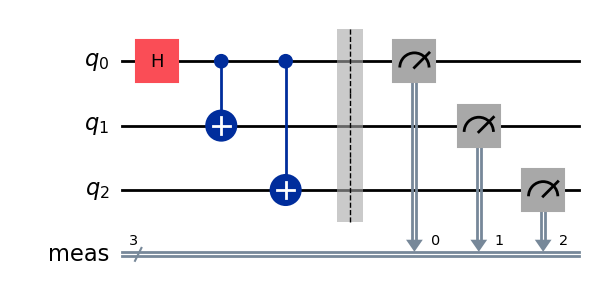

In [ ]:
from qiskit import QuantumCircuit, QuantumRegister

circ = QuantumCircuit(3)
circ.h(0)
circ.cx(0, 1)
circ.cx(0,2)
circ.measure_all()

circ.draw("mpl")

In [ ]:
from qiskit import QuantumCircuit, QuantumRegister

from qiskit.quantum_info import SparsePauliOp
from qiskit_aer.primitives import Estimator

qubits = QuantumRegister(2, name="q")
circuit = QuantumCircuit(qubits)

q0, q1 = qubits
circuit.h(0)
circuit.cx(q0, q1)

observable = SparsePauliOp("ZZ")

estimator = Estimator()
job = estimator.run(circuit, observable)
exact_value = job.result().values[0]
print(exact_value)

1.0


In [1]:
from qiskit_aer.noise import NoiseModel
from qiskit_aer.primitives import Estimator
from qiskit_ibm_runtime import QiskitRuntimeService
from qiskit_aer.noise import ReadoutError, depolarizing_error

noisemodel = NoiseModel()
cx_expolarizing_prob = 0.02
bit_flip_prob = 0.05
noisemodel.add_all_qubit_quantum_error(
    depolarizing_error(cx_expolarizing_prob, 2), ["cx"]
)
print(noisemodel)

NoiseModel:
  Basis gates: ['cx', 'id', 'rz', 'sx']
  Instructions with noise: ['cx']
  All-qubits errors: ['cx']
